In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import numpy as np

In [3]:
df1 = pd.read_csv("C://Users//Ananthram Vasu//Downloads//MultipleDisease Prediction//parkinsons.csv")

In [5]:
df1.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df1.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
df1.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
(df1==0).sum()

name                 0
MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)         0
MDVP:Flo(Hz)         0
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer(dB)     0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
status              48
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

In [12]:
df1['status'].count()

195

In [15]:
df1['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [16]:
# Removing the 'name' column as it's non-numeric
df1 = df1.drop(columns=['name'])

In [17]:
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


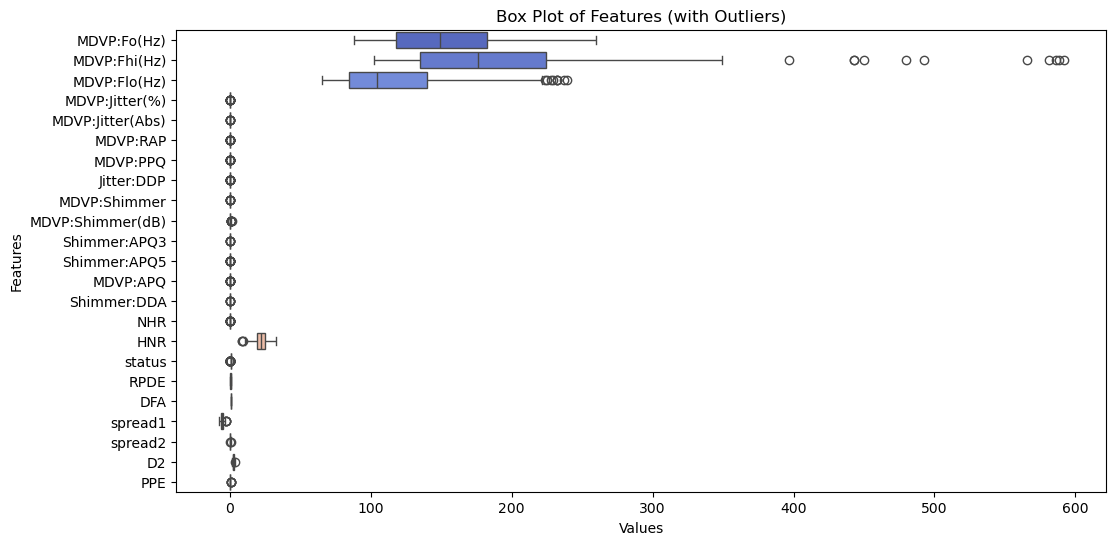

MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)        11
MDVP:Flo(Hz)         9
MDVP:Jitter(%)      14
MDVP:Jitter(Abs)     7
MDVP:RAP            14
MDVP:PPQ            15
Jitter:DDP          14
MDVP:Shimmer         8
MDVP:Shimmer(dB)    10
Shimmer:APQ3         6
Shimmer:APQ5        13
MDVP:APQ            12
Shimmer:DDA          6
NHR                 19
HNR                  3
status              48
RPDE                 0
DFA                  0
spread1              4
spread2              2
D2                   1
PPE                  5
dtype: int64

In [18]:
# Detect outliers using IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values outside 1.5*IQR range)
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outlier_counts = outliers.sum()

# Visualize using an improved box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

# Display count of outliers per feature
outlier_counts

In [19]:
# Treating Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
df1 = df1.copy()
df1 = df1.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify if outliers are capped
outliers_after = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()
outliers_after

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

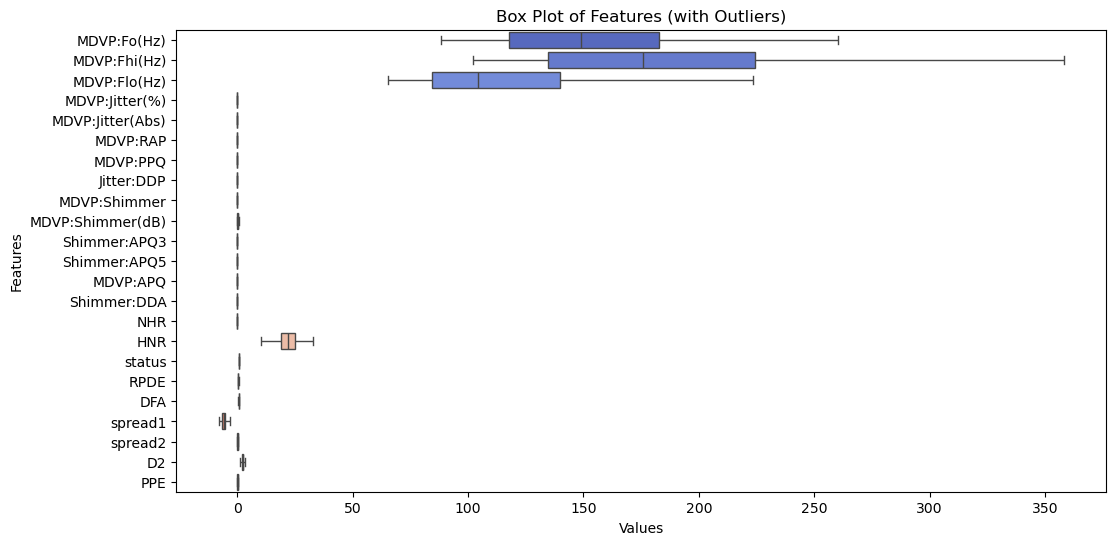

In [20]:
# Visualize using an improved box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

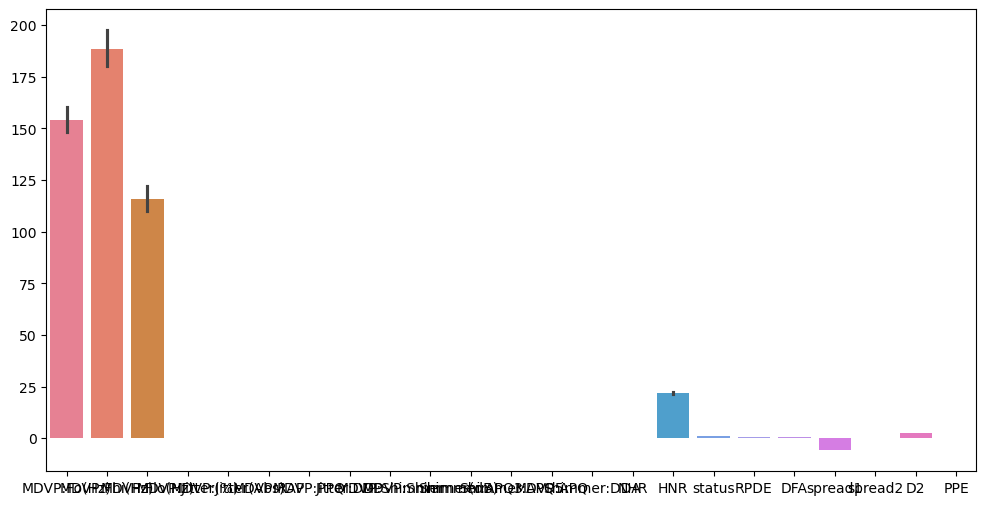

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1)
plt.show()

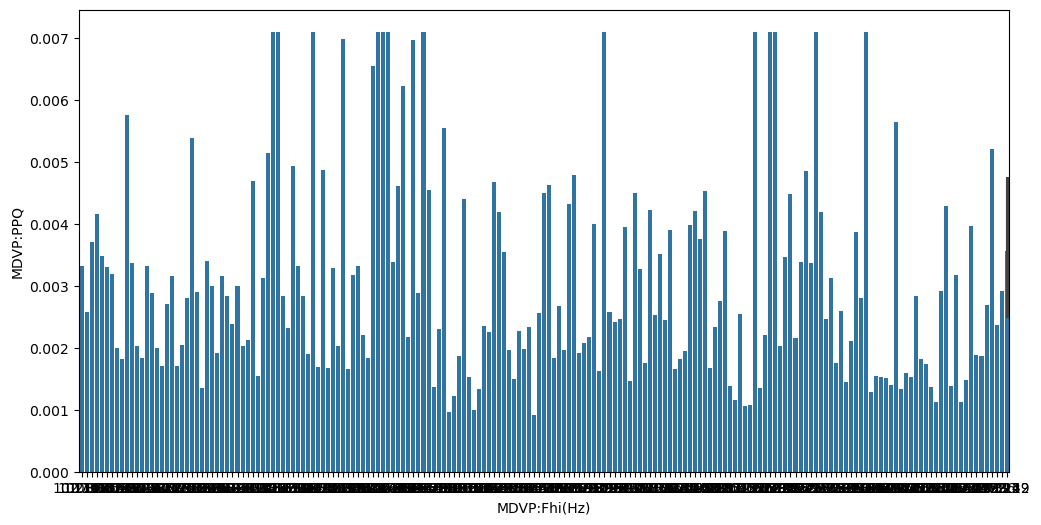

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1,x='MDVP:Fhi(Hz)',y='MDVP:PPQ')
plt.show()

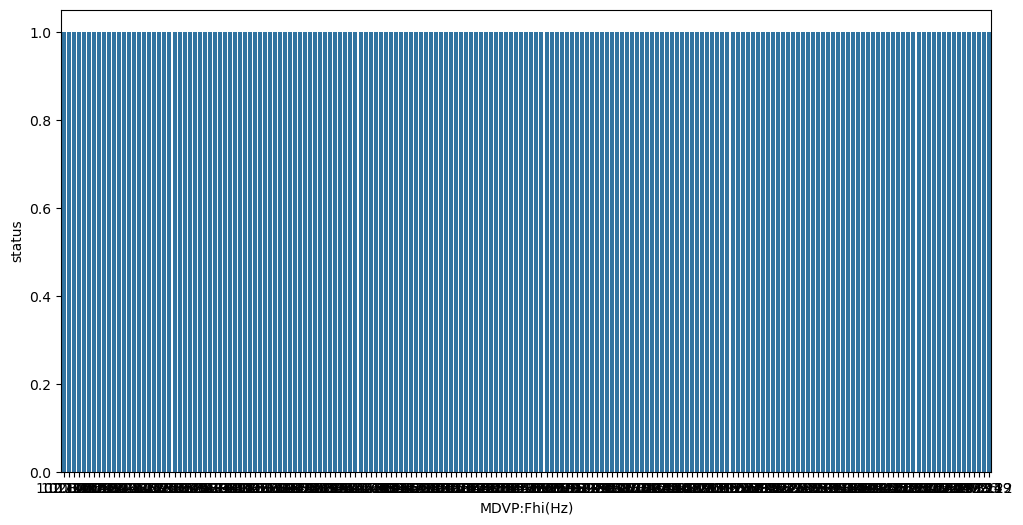

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1,x='MDVP:Fhi(Hz)',y='status')
plt.show()

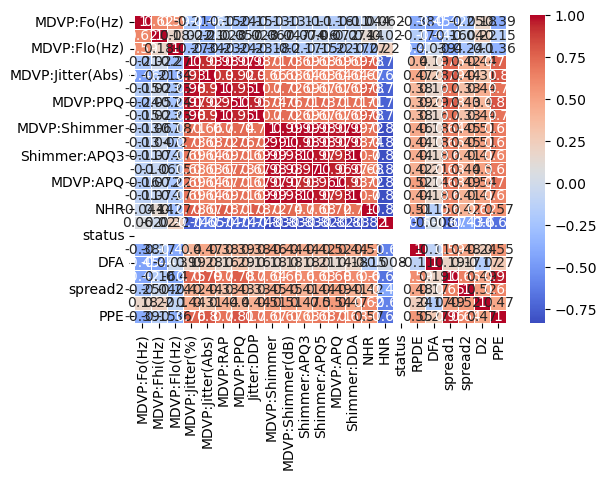

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

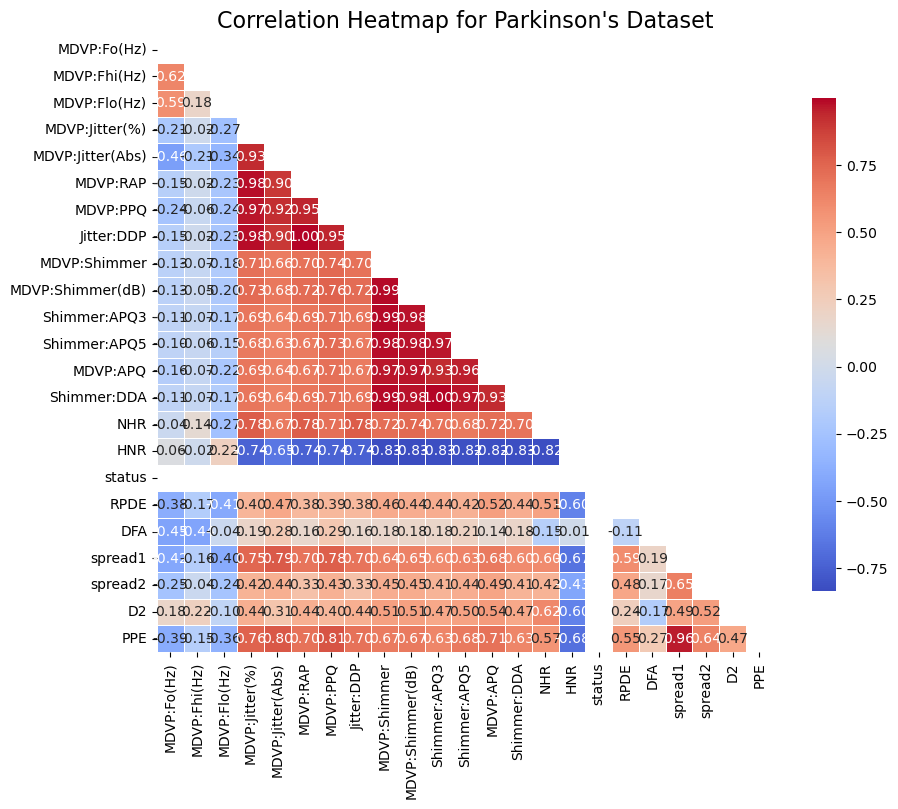

In [25]:
# Calculate correlation matrix
corr = df1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f",linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap for Parkinson\'s Dataset', fontsize=16)
plt.show()

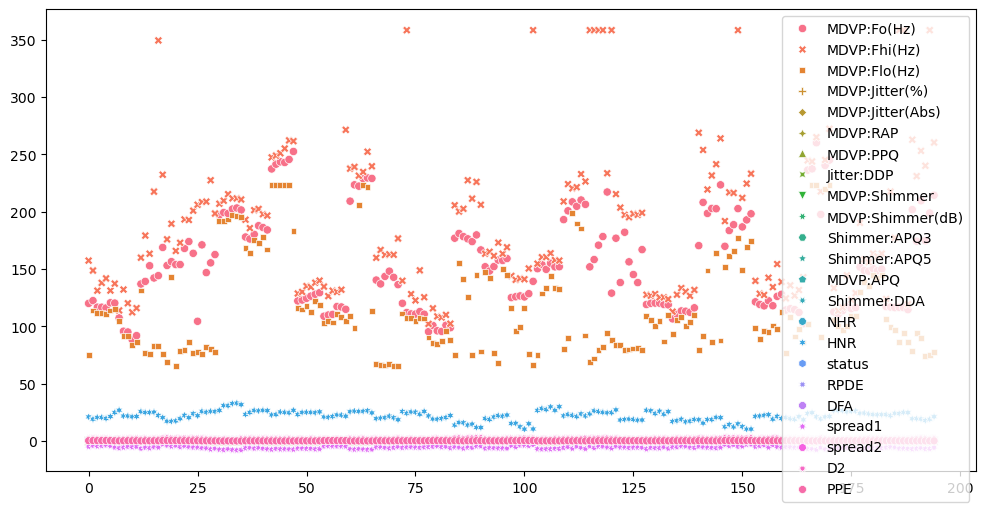

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [29]:
df1.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [30]:
X = df1[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']]
y = df1['status']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)

In [35]:
print(df1['status'].value_counts())

status
1    195
Name: count, dtype: int64


In [34]:
#Logistic Regression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1